In [1]:
from edgar_prelim import *
import pandas as pd
%load_ext autoreload
%autoreload 2
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
cik='0000004962'

In [3]:
# Parameters
cik = "0000730708"


# Company

In [4]:
cik_df = pd.read_sql(text("select cik, sic, sic_description, company_name, ticker from cik where cik = :cik").bindparams(cik=cik), prelim_engine)
cik_df.rename({'cik': 'CIK', 'sic': 'SIC', 'sic_description': 'Description', 'company_name': 'Name', 'ticker': 'Ticker'}, axis=1).T.rename({0: ''}, axis=1)

,
CIK,0000730708
SIC,6022
Description,STATE COMMERCIAL BANKS
Name,SEACOAST BANKING CORP OF FLORIDA
Ticker,SBCF


In [5]:
prelims = query_prelims(cik)

# Summary Statistics

In [6]:
prelims.groupby('item').item_value.describe()

,count,mean,std,min,25%,50%,75%,max
item,,,,,,,,
book value per share,57.0,7.446140e+00,4.245248e+00,1.18,1.8,8.94,10.99,14.7
interest income,57.0,3.235404e+07,2.832097e+07,15923000.00,19350000.0,26272000.00,36208000.00,191596000.0
net income,57.0,2.209491e+06,1.334074e+07,-40777000.00,285000.0,2996000.00,5833000.00,45867000.0
net interest income,57.0,2.604054e+07,2.670029e+07,12220000.00,16456000.0,19051000.00,23048000.00,176296000.0
provision for loan losses,57.0,5.108632e+06,1.071266e+07,-1444000.00,280000.0,855000.00,3813000.00,45374000.0
total revenue,2.0,1.807600e+07,3.790092e+05,17808000.00,17942000.0,18076000.00,18210000.00,18344000.0


# Plots

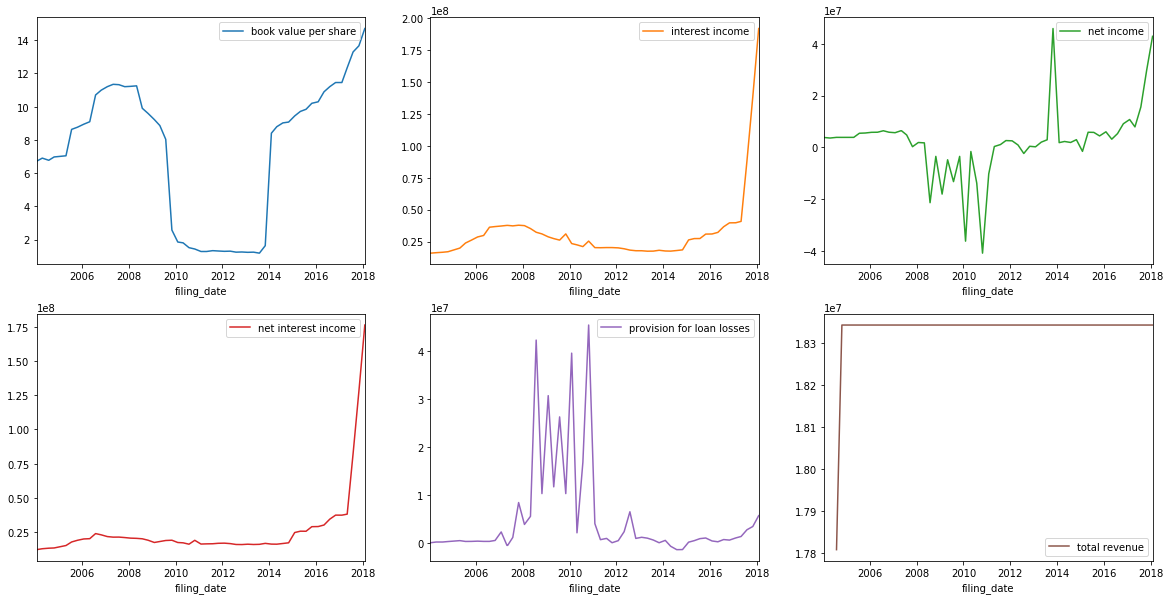

In [7]:
_ = prelims.set_index('filing_date').pivot(columns='item', values='item_value').fillna(method="ffill").plot(subplots=True, layout=(2, 3), figsize=(20, 10), sharex=False)

# Quality

In [8]:
validate_prelims(prelims)

period msg_type  \
cik        item                                                               
0000730708 book value per share                             2004Q4  missing   
           interest income                                  2004Q4  missing   
           interest income                                  2010Q3  missing   
           net income                                       2004Q4  missing   
           net income                                       2010Q3  missing   
           net interest income                              2004Q4  missing   
           net interest income                              2010Q3  missing   
           provision for loan losses                        2004Q4  missing   
           provision for loan losses                        2010Q3  missing   
           total revenue               2003Q4 to 2004Q1: 2 periods  missing   
           total revenue              2004Q4 to 2017Q4: 53 periods  missing   

                                             message  
cik        item                                       
0000730708 book value per share       Missing period  
           interest income            Missing period  
           interest income            Missing period  
           net income                 Missing period  
           net income                 Missing period  
           net interest income        Missing period  
           net interest income        Missing period  
           provision for loan losses  Missing period  
           provision for loan losses  Missing period  
           total revenue              Missing period  
           total revenue              Missing period

# Data

In [9]:
def make_clickable(val: str) -> str: 
    if isinstance(val, str):
        name, url = val.split('#')
        return f'<a href="{url}">{name}</a>'
    else:
        return ''

(prelims
 .assign(fiscal_period = prelims.fiscal_period.str.cat(prelims.filing_href, sep='#'), filing_date = prelims.filing_date.map(lambda d: d.strftime('%Y-%m-%d')))
 .loc[:, ['filing_date', 'fiscal_period', 'item', 'item_value', 'src_table', 'src_row', 'src_column', 'src_value', 'src_units']]
 .set_index(['filing_date', 'item'])
 .style.format({'fiscal_period': make_clickable})
)

In [10]:
#discard_prelim(cik, date(2019, 12, 31))
#force_reload_prelim(cik, date(2019, 12, 31), delete_filings=False)
#force_reload_prelim_between(cik,  start=date(2002, 6, 1), end=date(2019, 12, 31), delete_filings=False)

In [11]:
#d = date(2018, 10, 29)
#extract_prelim_statements(cik, start=d, end=d)

In [12]:
#d = date(2019, 4, 22)
#filings = query_edgar_for_filings(cik, "8-K", start=d, end=d, require_xbrl=False)
#report = query_edgar_for_submission_text(filings[0].href)
#submission = load_submission(report.href)
#tables = list(parse_tables(submission))
#items_from_tables(tables)

In [13]:
#widget = query_prelims_for_override(cik, filing_date='2006-01-27', item=None)
#widget

In [14]:
#widget.save()